# 1. Chuẩn bị thư viện và dữ liệu

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [2]:
df = pd.read_csv('ETH_Dataset.csv')
df['ClosingPrice'] = df['Closing Price (USD)']/10000
df.pop('Currency')
df.pop('24h Open (USD)')
df.pop('24h High (USD)')
df.pop('24h Low (USD)')
df.pop('Closing Price (USD)')
df

,Date,ClosingPrice
0,2020-06-01,0.023125
1,2020-06-02,0.025006
2,2020-06-03,0.023731
3,2020-06-04,0.024452
4,2020-06-05,0.024341
...,...,...
381,2021-06-17,0.238713
382,2021-06-18,0.234291
383,2021-06-19,0.220833
384,2021-06-20,0.218141


**Vẽ sơ đồ minh họa**

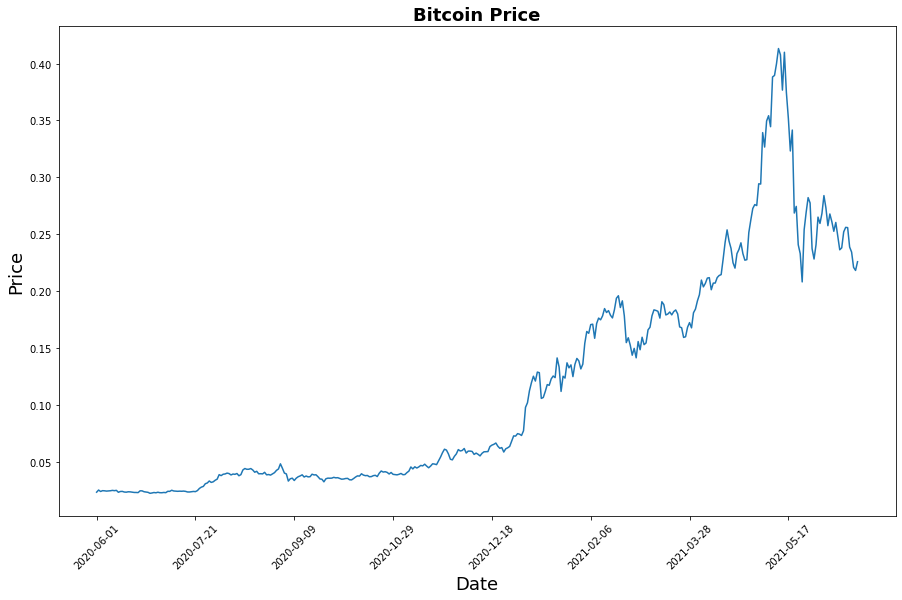

In [3]:
price = df[['ClosingPrice']]

plt.figure(figsize = (15,9))
plt.plot(price)
plt.xticks(range(0, df.shape[0],50), df['Date'].loc[::50],rotation=45)
plt.title("Bitcoin Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.show()

# 2. Tiền xử lý và Chia train/test

In [4]:
price = np.array(price)
price

array([[0.02312504],
       [0.02500599],
       [0.02373091],
       [0.02445194],
       [0.02434133],
       [0.02407664],
       [0.02423214],
       [0.02438257],
       [0.02470408],
       [0.02445429],
       [0.02474454],
       [0.02305056],
       [0.02372197],
       [0.02382201],
       [0.02326133],
       [0.0231255 ],
       [0.02347509],
       [0.0234031 ],
       [0.02318059],
       [0.02288903],
       [0.02287452],
       [0.02276155],
       [0.02432282],
       [0.02429271],
       [0.02351757],
       [0.02325691],
       [0.02299451],
       [0.02214079],
       [0.02241848],
       [0.02283333],
       [0.02259468],
       [0.02307049],
       [0.0226723 ],
       [0.02263593],
       [0.02288072],
       [0.02270958],
       [0.02389297],
       [0.0238434 ],
       [0.02482819],
       [0.02417872],
       [0.02401468],
       [0.02389943],
       [0.02402237],
       [0.02393273],
       [0.02408414],
       [0.02384254],
       [0.02330853],
       [0.023

In [5]:
train_size = int(len(df) * 0.80)
test_size = len(df) - train_size

In [6]:
train, test = price[0:train_size,:], price[train_size:len(df),:]
print(len(train), len(test))

308 78


In [7]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [8]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(304, 3)
(304,)
(74, 3)
(74,)


In [9]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
trainX = trainX.reshape((trainX.shape[0], trainX.shape[1], n_features))
trainX.shape
testX = testX.reshape((testX.shape[0], testX.shape[1], n_features))
testX.shape

(74, 3, 1)

# 3. Building Model

In [10]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(look_back, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(trainX, trainY, epochs=300, verbose=1)

Epoch 1/300
10/10 [==============================] - 3s 4ms/step - loss: 0.0072
Epoch 2/300
10/10 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 3/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 4/300
10/10 [==============================] - 0s 4ms/step - loss: 0.0027
Epoch 5/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 6/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 7/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 8/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 9/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 10/300
10/10 [==============================] - 0s 3ms/step - loss: 5.0852e-04
Epoch 11/300
10/10 [==============================] - 0s 3ms/step - loss: 1.5925e-04
Epoch 12/300
10/10 [==============================] - 0s 3ms/step - loss: 5.3719e-05
Epoch 13/300
10/10 [=====

10/10 [==============================] - 0s 4ms/step - loss: 4.9278e-05
Epoch 98/300
10/10 [==============================] - 0s 4ms/step - loss: 3.1502e-05
Epoch 99/300
10/10 [==============================] - 0s 3ms/step - loss: 4.7557e-05
Epoch 100/300
10/10 [==============================] - 0s 3ms/step - loss: 3.3872e-05
Epoch 101/300
10/10 [==============================] - 0s 3ms/step - loss: 4.1710e-05
Epoch 102/300
10/10 [==============================] - 0s 3ms/step - loss: 4.9057e-05
Epoch 103/300
10/10 [==============================] - 0s 3ms/step - loss: 4.5137e-05
Epoch 104/300
10/10 [==============================] - 0s 3ms/step - loss: 4.1031e-05
Epoch 105/300
10/10 [==============================] - 0s 3ms/step - loss: 5.6453e-05
Epoch 106/300
10/10 [==============================] - 0s 3ms/step - loss: 3.9492e-05
Epoch 107/300
10/10 [==============================] - 0s 3ms/step - loss: 4.4475e-05
Epoch 108/300
10/10 [==============================] - 0s 3ms/step - l

10/10 [==============================] - 0s 3ms/step - loss: 4.2795e-05
Epoch 193/300
10/10 [==============================] - 0s 3ms/step - loss: 3.5478e-05
Epoch 194/300
10/10 [==============================] - 0s 3ms/step - loss: 4.3353e-05
Epoch 195/300
10/10 [==============================] - 0s 3ms/step - loss: 3.4302e-05
Epoch 196/300
10/10 [==============================] - 0s 3ms/step - loss: 4.1079e-05
Epoch 197/300
10/10 [==============================] - 0s 3ms/step - loss: 4.5138e-05
Epoch 198/300
10/10 [==============================] - 0s 3ms/step - loss: 4.0540e-05
Epoch 199/300
10/10 [==============================] - 0s 3ms/step - loss: 4.1779e-05
Epoch 200/300
10/10 [==============================] - 0s 3ms/step - loss: 4.6088e-05
Epoch 201/300
10/10 [==============================] - 0s 4ms/step - loss: 3.6977e-05
Epoch 202/300
10/10 [==============================] - 0s 4ms/step - loss: 3.6596e-05
Epoch 203/300
10/10 [==============================] - 0s 3ms/step -

10/10 [==============================] - 0s 4ms/step - loss: 4.1555e-05
Epoch 288/300
10/10 [==============================] - 0s 3ms/step - loss: 4.0606e-05
Epoch 289/300
10/10 [==============================] - 0s 3ms/step - loss: 3.6396e-05
Epoch 290/300
10/10 [==============================] - 0s 3ms/step - loss: 3.5093e-05
Epoch 291/300
10/10 [==============================] - 0s 3ms/step - loss: 4.0295e-05
Epoch 292/300
10/10 [==============================] - 0s 3ms/step - loss: 3.1430e-05
Epoch 293/300
10/10 [==============================] - 0s 3ms/step - loss: 3.4205e-05
Epoch 294/300
10/10 [==============================] - 0s 3ms/step - loss: 4.1414e-05
Epoch 295/300
10/10 [==============================] - 0s 3ms/step - loss: 3.8941e-05
Epoch 296/300
10/10 [==============================] - 0s 3ms/step - loss: 3.9310e-05
Epoch 297/300
10/10 [==============================] - 0s 3ms/step - loss: 2.9282e-05
Epoch 298/300
10/10 [==============================] - 0s 3ms/step -

In [11]:
LSTM_predict= model.predict(testX)
LSTM_predict.reshape(-1,1)

array([[0.2079577 ],
       [0.20645677],
       [0.205651  ],
       [0.20380275],
       [0.20699728],
       [0.20871493],
       [0.21085063],
       [0.2146803 ],
       [0.22113957],
       [0.23150603],
       [0.23725012],
       [0.23666443],
       [0.22894962],
       [0.22299676],
       [0.2208992 ],
       [0.22331598],
       [0.2296132 ],
       [0.23003466],
       [0.2281238 ],
       [0.22409333],
       [0.22683617],
       [0.23508269],
       [0.24771903],
       [0.25451022],
       [0.25856736],
       [0.26277515],
       [0.26757264],
       [0.28181627],
       [0.29180568],
       [0.30757308],
       [0.31054434],
       [0.31775767],
       [0.32473797],
       [0.33411622],
       [0.3513471 ],
       [0.35736072],
       [0.3637041 ],
       [0.3596715 ],
       [0.3562199 ],
       [0.34843373],
       [0.34359354],
       [0.31958658],
       [0.30935016],
       [0.28731498],
       [0.2772763 ],
       [0.24856238],
       [0.24062024],
       [0.222

In [12]:
testY = testY.reshape(-1,1)
testY.shape

(74, 1)

In [13]:
date = pd.to_datetime(df.Date).astype(np.int64)

In [14]:
date = date[(len(date)-len(testY)):]
date

312    1617926400000000000
313    1618012800000000000
314    1618099200000000000
315    1618185600000000000
316    1618272000000000000
              ...         
381    1623888000000000000
382    1623974400000000000
383    1624060800000000000
384    1624147200000000000
385    1624233600000000000
Name: Date, Length: 74, dtype: int64

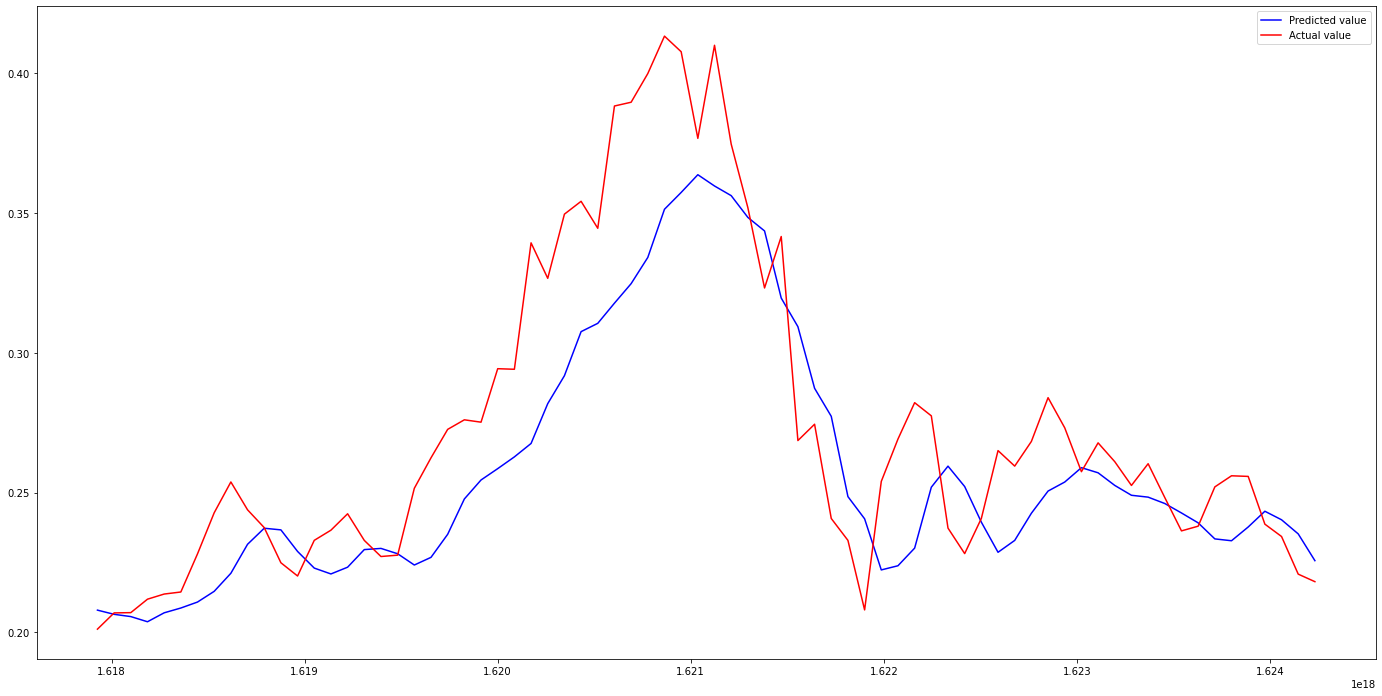

In [15]:
fig= plt.figure(figsize=(24,12))
plt.plot(date,LSTM_predict,color='blue', label='Predicted value')
plt.plot(date,testY,color='red', label='Actual value')
plt.legend()
plt.show()

# 4. Đánh Giá mô hình

In [16]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [17]:
#MAPE
mean_absolute_percentage_error(testY, LSTM_predict)

7.989284196051032

In [18]:
#RMSE
import math
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(testY, LSTM_predict)
RMSE = math.sqrt(MSE)
print(RMSE)

0.029882017886526283
